# 02 - Pre-processing 

The intuition of this notebook is to build the pre-processing stages to be able to fit/evaluate differentes models.

### Steps: 
 - Importing/accessing the data;
 - Converting the data to 1D array
 - Indentify the labels with the pictures 


### Importing/acessing the data

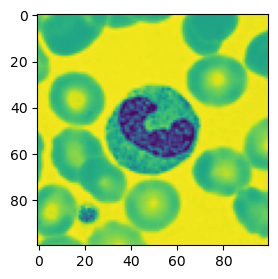

Our original image shape is: (100, 100), and it is in gray scale (has only one chanel of colors).


In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image

#getting a image to work the pre-process
one_image = '../datasets/dataset_normal/neutrophil/BNE_4555.jpg'

# converting the image to grayscale
image = Image.open(one_image).convert('L')

# resizing the image
image = image.resize((100, 100))
image = np.array(image, dtype = 'float32')


#plotting the image
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.show()

print(f'Our original image shape is: {image.shape}, and it is in gray scale (has only one chanel of colors).')

### Converting to 1D array

In [6]:
print(f'Our original dataset shape is: {image.shape}')

flattened_dataset = np.reshape(image, -1 )

print(f'Our flat dataset shape is: {flattened_dataset.shape}')
# print(flattened_dataset) #returns an array 1D

Our original dataset shape is: (100, 100)
Our flat dataset shape is: (10000,)


### Putting everything together 

In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dataset_directory = '../datasets/dataset_normal/'

# Load and preprocess images
def load_images(directory):
    images = []
    labels = []
    for label, folder in enumerate(os.listdir(directory)):
        for filename in os.listdir(os.path.join(directory, folder)):
            img = cv2.imread(os.path.join(directory, folder, filename))
            img = cv2.resize(img, (100, 100))  # Resize image
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            images.append(img.flatten())  # Flatten image
            labels.append(label)
    return np.array(images), np.array(labels)

# Feature extraction
images, labels = load_images(dataset_directory)

# Feature scaling (optional but recommended)
images = images / 255.0  # Scale pixel values to range [0, 1]


In [57]:
print(images.shape)

# print(labels)


(17092, 10000)
